In [1]:
library(dplyr)
library(readr)
library(tidytext)

df <- read.csv("C:\\Users\\radha31\\Downloads\\500_questions.csv" , header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

tidy_books <- df %>% unnest_tokens(word,question)
tidy_booksN <- df %>% unnest_tokens(word,question)
head(tidy_books)
dim(tidy_books)

str(tidy_books)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



,X,word
1,2254,avg
1.1,2254,of
1.2,2254,42
1.3,2254,what
1.4,2254,is
1.5,2254,a


[1] 13837     2

'data.frame':	13837 obs. of  2 variables:
 $ X   : int  2254 2254 2254 2254 2254 2254 2254 2254 1390 1390 ...
 $ word: chr  "avg" "of" "42" "what" ...


In [2]:
data(stop_words)

tidy_books <- tidy_books %>%
  anti_join(stop_words)

head(tidy_books)
dim(tidy_books)


Joining, by = "word"


X,word
2254,avg
2254,42
2254,sql
2254,view
1390,question
1390,involving


[1] 6355    2

In [3]:
tidy_books <- tidy_books %>%
  count(word, sort = TRUE) 
head(tidy_books,20)

word,n
sql,145
key,121
object,85
questions,73
data,63
class,53
server,52
database,50
table,50
time,46


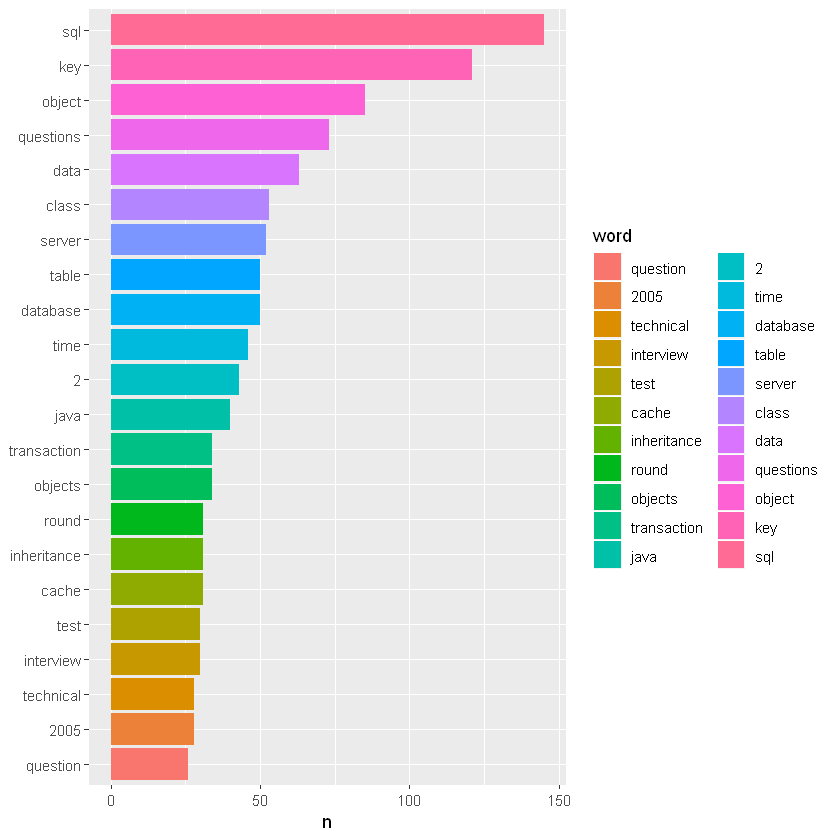

In [4]:
library(ggplot2)

tidy_books %>%
  mutate(word = reorder(word, n)) %>%
filter(n > 25) %>%
 
  ggplot(aes(word, n, fill=word)) +
  geom_col() +
  xlab(NULL) +
  coord_flip()

In [5]:
# Remove more stopwords

library(topicmodels)
library(tm)
tokenizing.phrases <- df$question
#tokenizing.phrases
#my.docs = c('the sky is blue, hot sun', 'flowers,hot sun', 'black cats, bees, rats and mice')
my.corpus = VCorpus(VectorSource(df$question))
my.dtm = DocumentTermMatrix(my.corpus)
inspect(my.dtm)




Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate



<<DocumentTermMatrix (documents: 500, terms: 3140)>>
Non-/sparse entries: 8985/1561015
Sparsity           : 99%
Maximal term length: 34
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  and are can for key sql that the was you
  100   2   0   0   2   0   0    2   4   3   3
  171   2   2   0   1   0   0    4  16   0   0
  200   6   1   1   1   0   0    5  14   0   4
  34   11   1   0   8   0   0    1   8   7   0
  442  10   3   2   3   1   0    3   7  10   0
  496  10   1   0   5   1   0    5   9   4   1
  57    0   0   0   2   0   0    0   5   1   6
  64    2   0   0   2   0   1    4   4   2   0
  66    6   0   0   4   0   0    4   9   4   2
  93    2   4   1   0   1   0    4   2   0   1


In [53]:
#tdm <- TermDocumentMatrix(my.corpus, control = list(tokenize = TrigramTokenizer)) 
#tdm
#str(tdm)

In [39]:
# install.packages("topicmodels")

# install.packages("tm")

#install.packages("RWeka")
#require(RWeka)

Loading required package: RWeka
Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


In [52]:
# tokenize into tri-grams
#trigram.twitterTdm <- tm::TermDocumentMatrix(my.corpus, control = list(tokenize = TrigramTokenizer))

#head(trigram.twitterTdm$dimnames )


# put into data frame
#freq.trigram.twitter <- data.frame(word = trigram.twitterTdm$dimnames$Terms, frequency = trigram.twitterTdm$v)
# reorder by descending frequency
#freq.trigram.twitter <- plyr::arrange(freq.trigram.twitter, -frequency)

In [6]:
library(dplyr)
library(tidytext)
library(janeaustenr)


In [11]:
tidy_booksN <-   unnest_tokens(bigram, text, token = "ngrams", n = 2)

tidy_booksN

ERROR: Error in unnest_tokens(bigram, text, token = "ngrams", n = 2): object 'bigram' not found


In [10]:
# Install and download JRE
# https://www.oracle.com/technetwork/java/javase/downloads/jre8-downloads-2133155.html
library("RWeka")

In [25]:
library(dplyr)
library(tidytext)
library(janeaustenr)

BigramTokenizer <- function(x) NGramTokenizer(x, Weka_control(min = 5, max = 5))
tdm <- TermDocumentMatrix(my.corpus, control = list(tokenize = BigramTokenizer))
tdm
#tidy_books <- unnest_tokens(bigram, text, token = "ngrams", n = 2)

#tidy_books

<<TermDocumentMatrix (terms: 11412, documents: 500)>>
Non-/sparse entries: 11917/5694083
Sparsity           : 100%
Maximal term length: 65
Weighting          : term frequency (tf)

In [26]:
inspect(tdm)

# Rgraphviz

#plot(tdm, terms = findFreqTerms(tdm, lowfreq = 2)[1:50], corThreshold = 0.5)

<<TermDocumentMatrix (terms: 11412, documents: 500)>>
Non-/sparse entries: 11917/5694083
Sparsity           : 100%
Maximal term length: 65
Weighting          : term frequency (tf)
Sample             :
                             Docs
Terms                         100 200 291 34 442 496 57 64 66 93
                                0   0   0  0   0   0  0  0  0  0
  100 msec main memory access   0   0   0  0   0   0  0  0  0  0
  4 marks and on a              0   0   0  0   0   0  0  0  0  0
  800 msec if the hit           0   0   0  0   0   0  0  0  0  0
  a correct ans score 4         0   0   0  0   0   0  0  0  0  0
  a wrong ans 2 marks           0   0   0  0   0   0  0  0  0  0
  access time 100 msec main     0   0   0  0   0   0  0  0  0  0
  access time 800 msec if       0   0   0  0   0   0  0  0  0  0
  and on a wrong ans            0   0   0  0   0   0  0  0  0  0
  ans score 4 marks and         0   0   0  0   0   0  0  0  0  0
